# Objective

In this challenge, we will explore the famous Iris dataset, go
through the steps of the Data Science Lifecycle, and build a
simple machine learning model from scratch that predicts
the species of an iris flower based on its measurements.

# Dataset

 Iris [Dataset](https://archive.ics.uci.edu/dataset/53/iris) (UCI ML Repository – Iris Data)

 The dataset variables include: 4 features

- Sepal length (cm)

- Sepal width (cm)

- Petal length (cm)

- Petal width (cm)

- Target: iris species (Iris-setosa, Iris-versicolor,
Iris-virginica) - 3 classes

# 1. Data Loading

## Import Necessary Python Modules

We will need the following libraries:
 - Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
 - Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
 - Matplotlib — plotting & visualization.
 - scikit-learn — a tool for data mining and machine learning models.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the Data

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#define column names as the dataset doesn't include a header row
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

#read the data
df = pd.read_csv(url, header=None, names=columns)

#print the first few rows
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# 2. Exploratory Data Analysis

## Let's Dig Deeper & Understand our Data

In [ ]:
#get the number of rows and columns
rows = df.shape[0]
columns = df.shape[1]

print('There are {} rows and {} columns.'.format(rows,columns))

There are 150 rows and 5 columns.


Using the function **info()**, we can check:
 - data types (int, float, or object (e.g., string))
 - missing values
 - memory usage
 - number of rows and columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


So we have 5 columns (4 features and 1 target variable) and 150 rows or entries.

Moreover there is no missing values in the dataset!!!

## Double Check Missing Values

In [ ]:
print('missing values per column')
print(df.isnull().sum())

missing values per column
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64


No missing values!!

Using the function **describe()**, we can check the mean, standard deviation, maximum, and minimum of each numerical feature (column)

In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Check for Duplicate Rows

In [ ]:
#Check for duplicate rows
print("Duplicate rows before removal:", df.duplicated().sum())

Duplicate rows before removal: 3


In [ ]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#Confirm removal
print("Duplicate rows after removal:", df.duplicated().sum())

Duplicate rows after removal: 0


In [ ]:
df.info() #double check, after duplicate rows removal

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   class         147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


## Check for Outliers

In [ ]:
#Detect Outliers using IQR
#Define numeric columns to check
numeric_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

#Dictionary for outlier counts
outlier_counts = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    #Count outliers
    count = df[(df[col] < lower) | (df[col] > upper)].shape[0]
    outlier_counts[col] = count

#Print the outliers per column
print("Outlier count per column (before removal):")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Outlier count per column (before removal):
sepal_length: 0
sepal_width: 4
petal_length: 0
petal_width: 0


## Boxplot to Visualize Outliers

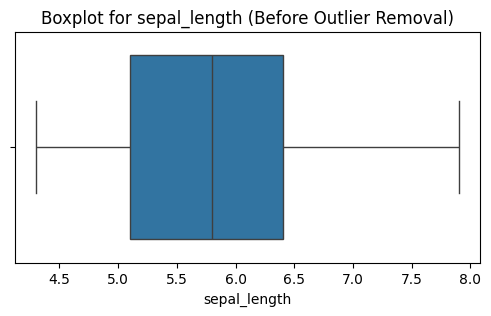

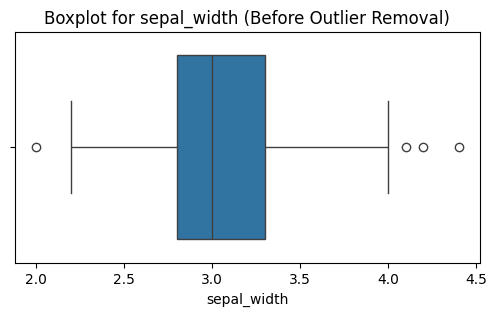

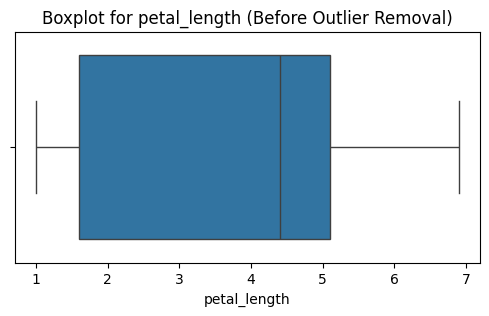

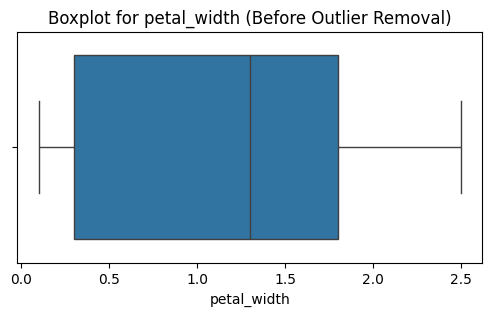

In [ ]:
#Boxplot to visualize outliers
import seaborn as sns
for col in numeric_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (Before Outlier Removal)')
    plt.show()

The sepal_width column contains 4 outliers, which can distort the mean and standard deviation used in Gaussian Naive Bayes. Since this model assumes normally distributed features, I will remove these outliers to improve prediction accuracy.

## Outliers Removal

In [ ]:
#IQR outlier removal
Q1 = df['sepal_width'].quantile(0.25)
Q3 = df['sepal_width'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#keep only non-outliers
df_clean = df[(df['sepal_width'] >= lower_bound) & (df['sepal_width'] <= upper_bound)]
print(f"Original size: {df.shape[0]}, Cleaned size: {df_clean.shape[0]}")

Original size: 147, Cleaned size: 143


The dataset originally had 150 rows, but 3 duplicate rows were removed before preprocessing.

We then identified 4 outliers in the sepal_width column and removed them to improve Gaussian Naive Bayes performance, resulting in a final dataset of 143 rows.

In [ ]:
#we will continue now using the cleaned dataset df_clean instead of the original df
df = df_clean.copy()

## Visualize the Class Distribution of our Dataset

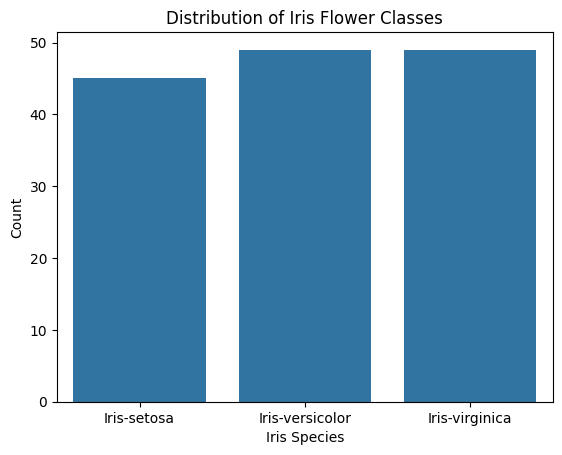

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#count plot for class distribution
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Flower Classes')
plt.xlabel('Iris Species')
plt.ylabel('Count')
plt.show()


The class distribution is nearly balanced across the 3 Iris species. After removing duplicates and outliers, each class still has roughly equal representation.

#3. Convert Categorical Columns to Numerical

We need to convert the 'class' column from Iris-setosa, Iris-versicolor,
Iris-virginica to 0,1,2 and rename it as 'target'.




In [ ]:
print(df['class'].unique()) #checking how the 3 classes are actually written in the dataset

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [ ]:
#converting to numeric using LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['target'] = le.fit_transform(df['class'])

#print the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Iris-setosa': np.int64(0), 'Iris-versicolor': np.int64(1), 'Iris-virginica': np.int64(2)}


In [ ]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width        class  target
0           5.1          3.5           1.4          0.2  Iris-setosa       0
1           4.9          3.0           1.4          0.2  Iris-setosa       0
2           4.7          3.2           1.3          0.2  Iris-setosa       0
3           4.6          3.1           1.5          0.2  Iris-setosa       0
4           5.0          3.6           1.4          0.2  Iris-setosa       0


Alright, so now the 'class' feature is renamed as 'target', converted from categorial string to numerical values 0,1,2 where 0 is 'Iris-setosa', 1 is 'Iris-versicolor, and 3 is 'Iris-virginica' respectively.

## Correlation Heatmap

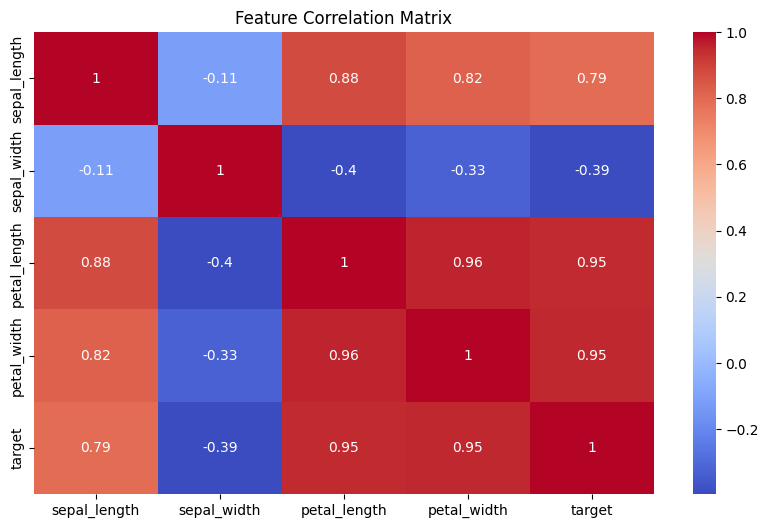

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop(columns=['class']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


The heatmap shows that petal_length and petal_width are very strongly and positively correlated with the target (0.95), making them highly predictive.

sepal_length also shows a strong positive correlation with the target (0.79), indicating it's moderately important for classification.

On the other hand, sepal_width is weakly and negatively correlated with the target (-0.39), making it the least informative feature.

# 4. Gaussian Naive Bayes - from Scratch Version

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def gaussian_pdf(x, mean, var):
    eps = 1e-6  #to avoid division by zero
    coeff = 1.0 / np.sqrt(2 * np.pi * var + eps)
    exponent = np.exp(-(x - mean) ** 2 / (2 * var + eps))
    return coeff * exponent

def naive_bayes_predict(data, X_test, target_name):
    class_labels = data[target_name].unique()
    class_stats = {}

    #precompute class statistics
    for label in class_labels:
        subset = data[data[target_name] == label]
        means = subset.drop(columns=[target_name]).mean()
        variances = subset.drop(columns=[target_name]).var()
        prior = len(subset) / len(data)
        class_stats[label] = {'mean': means, 'var': variances, 'prior': prior}

    predictions = []
    for features in X_test.values:
        posteriors = {}
        for label in class_labels:
            stats = class_stats[label]
            probs = gaussian_pdf(features, stats['mean'], stats['var'])
            posteriors[label] = np.prod(probs) * stats['prior']
        predicted_label = max(posteriors, key=posteriors.get)
        predictions.append(predicted_label)

    return np.array(predictions)

## Train the Model and Make Predictions

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['class', 'target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#combine train features and target
train_data = X_train.copy()
train_data['target'] = y_train

#make a prediction
y_pred = naive_bayes_predict(train_data, X_test, 'target')
print(y_pred)


[2 0 1 2 1 0 2 1 1 0 1 1 2 2 1 2 0 1 2 1 0 2 2 1 1 1 0 0 0]


## Model Evaluation

In [ ]:
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.896551724137931
Confusion Matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



# 5. Gaussian Naive Bayes - Scikit-learn’s Version

## Prepare Features and Target

## Then, Model Training and Making Predictions

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#prepare features and target

X = df.drop(['class', 'target'], axis=1)
Y = df['target']

#split data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#train the Gaussian Naive Bayes model

clf = GaussianNB() #for continuous features
clf.fit(X_train, y_train)
#make a prediction
y_pred = clf.predict(X_test)
print("Predictions on test set:", y_pred)


Predictions on test set: [2 0 1 2 1 0 2 1 1 0 1 1 2 2 1 2 0 1 2 1 0 2 2 1 1 1 0 0 0]


## Model Evaluation

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.896551724137931
Confusion Matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29



The predicted labels from the Gaussian Naive Bayes perfectly match the comparison results.

The model achieved an overall accuracy of about 89.66%.

Class 0 (Iris-setosa) scored 100% precision, 100% recall, and f1-score of 1.00. So the model is confident and very accurate about predicting Iris-setosa in particular.

Class 1 (Iris-versicolor) achieved precision of 83%, recall of 91%, and f1-score of 0.87. So the model successfully detects most of Iris-versicolor but a few are misclassified in this class.

Class 2 (Iris-virginica) showed precision of 89%, recall of 80%, and f1-score of 0.84. So the model is careful when predicting Iris-virginica. It only labels a flower as that class when it's sure.

# 6. Snippet to Test the Model On

## Test on Gaussian Naive Bayes

In [ ]:
import numpy as np
import pandas as pd

#custom input sample
custom_input = np.array([5.8, 2.8, 5.1, 2.4])

#convert to DataFrame with same feature columns as training data (excluding target)
custom_df = pd.DataFrame(custom_input.reshape(1, -1), columns=train_data.columns.drop('target'))

#predict using your custom Naive Bayes function
custom_pred = naive_bayes_predict(train_data, custom_df, 'target')[0]

#decode class name from original labels
class_names = df['class'].astype('category').cat.categories
print(f"Custom Naive Bayes prediction: Class index = {custom_pred}, Class name = {class_names[custom_pred]}")


Custom Naive Bayes prediction: Class index = 2, Class name = Iris-virginica


## Test on Scikit-learn

In [ ]:
import numpy as np

#custom input sample
custom_input = np.array([5.8, 2.8, 5.1, 2.4]).reshape(1, -1)

#predict using scikit-learn GaussianNB model
sklearn_pred = clf.predict(custom_input)[0]

#decode class name from original labels
class_names = df['class'].astype('category').cat.categories
print(f"scikit-learn prediction: Class index = {sklearn_pred}, Class name = {class_names[sklearn_pred]}")

scikit-learn prediction: Class index = 2, Class name = Iris-virginica


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Both the custom Gaussian Naive Bayes implementation and scikit-learn’s model predict the same class (Iris-virginica) for the custom input [5.8, 2.8, 5.1, 2.4], confirming that our manual implementation correctly replicates the behavior of the standard algorithm.

# Findings and Conclusion

In this challenge, we explored and preprocessed the Iris dataset, encoded the target and ensured numeric features.

A Gaussian Naive Bayes model was implemented from scratch and compared to scikit-learn’s version.

Both showed consistent predictions and strong performance (89.66% accuracy) across all classes. Testing on custom inputs confirmed the models’ reliability.

Overall, this validates the effectiveness of Gaussian Naive Bayes for continuous multiclass classification.

